In [ ]:
# installare (se necessario) e importare GeoPandas

In [1]:
!pip install GeoPandas
import geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 45.7 MB/s 
     |████████████████████████████████| 15.4 MB 44.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip
piste_ciclabili = geopandas.read_file("/content/drive/MyDrive/bike_ciclabili.zip")

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

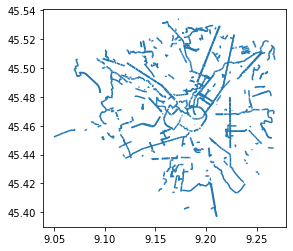

In [5]:
piste_ciclabili.plot()

In [7]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm.zip")

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [8]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


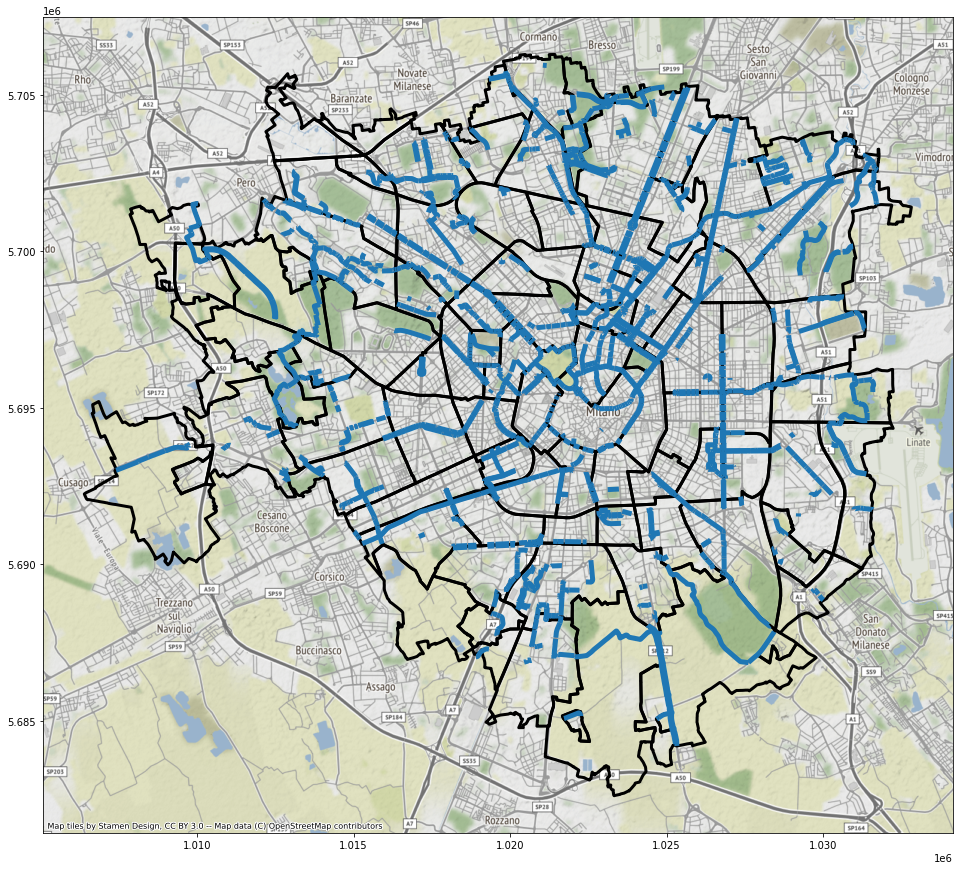

In [9]:
ax = quartieri.to_crs(epsg=3857).plot(facecolor = "none", edgecolor = "k", figsize = (30,15), linewidth = 3)
piste_ciclabili.to_crs(epsg=3857).plot(ax = ax, linewidth = 5)
ctx.add_basemap(ax)

In [12]:
# trovare il quartiere meno esteso
quartiere_small = quartieri[quartieri["Shape_Area"] == quartieri["Shape_Area"].min()]
quartiere_small

ID_NIL  ...                                           geometry
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...

[1 rows x 9 columns]

In [13]:
# trovare il quartiere più esteso
quartiere_big = quartieri[quartieri["Shape_Area"] == quartieri["Shape_Area"].max()]
quartiere_big

ID_NIL  ...                                           geometry
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...

[1 rows x 9 columns]

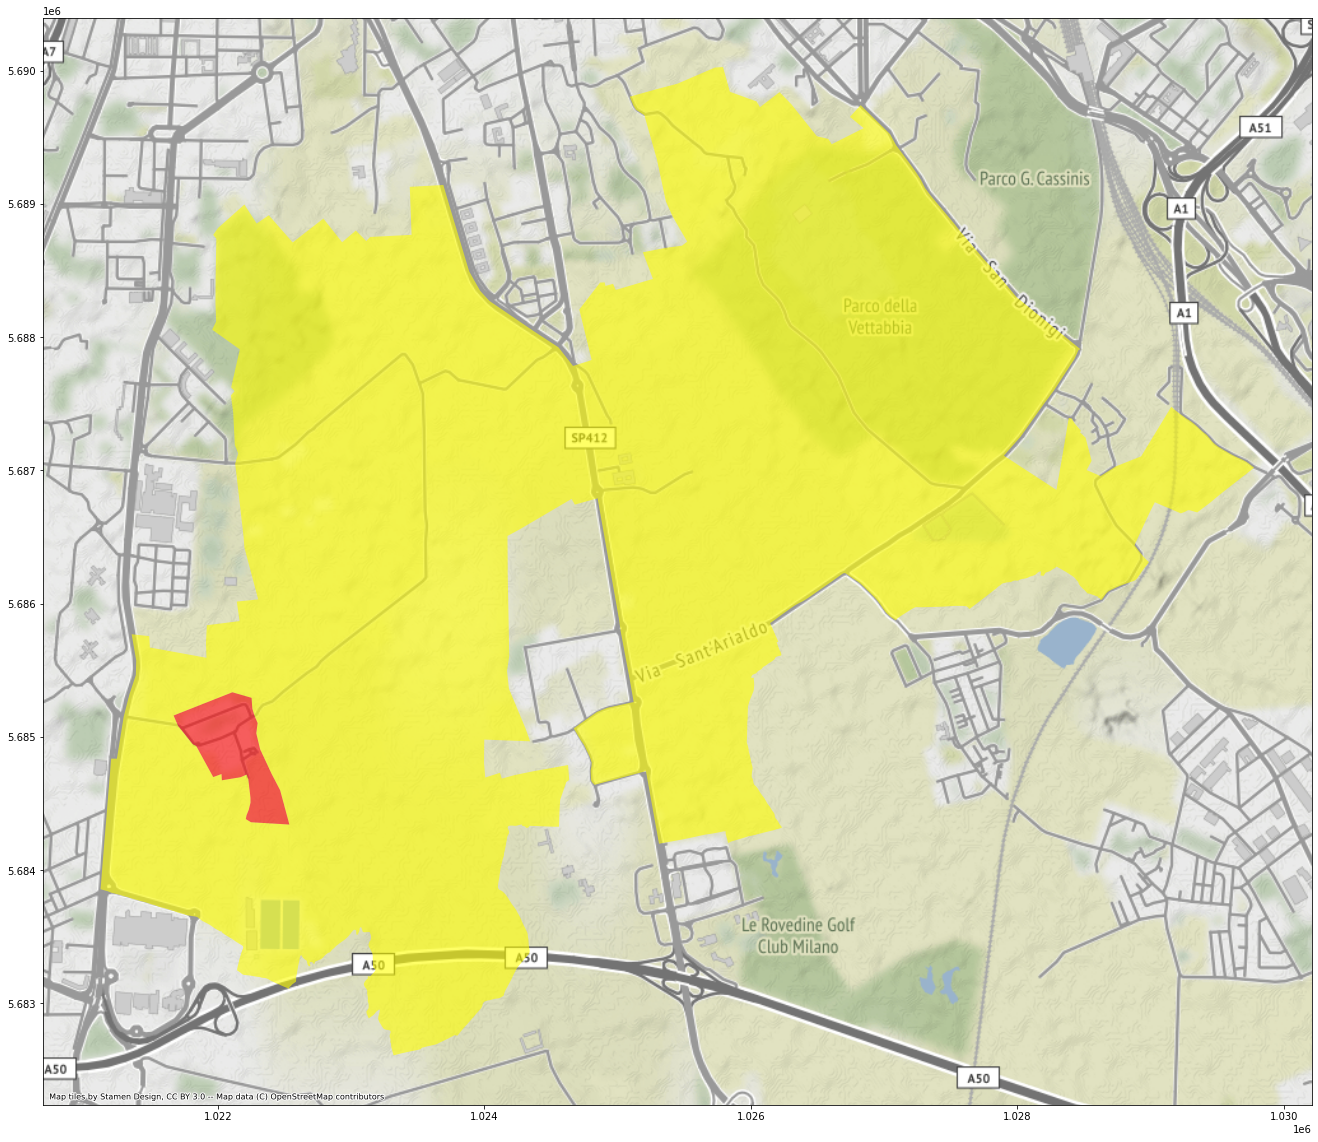

In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax = quartiere_big.to_crs(epsg=3857).plot(figsize=(30,15), facecolor = "yellow", alpha =0.6)
quartiere_small.to_crs(epsg=3857).plot(ax = ax, facecolor = "r", alpha = 0.6)
ctx.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [14]:
affori = quartieri[quartieri["NIL"] == "AFFORI"]
affori

ID_NIL     NIL  ... OBJECTID                                           geometry
69      80  AFFORI  ...      158  POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...

[1 rows x 9 columns]

In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [15]:
piste_affori = piste_ciclabili[piste_ciclabili.intersects(affori.geometry.squeeze())]
piste_affori

id_amat  ...                                           geometry
32       9039  ...    LINESTRING (9.17915 45.51407, 9.17960 45.51413)
252      9299  ...  LINESTRING (9.18299 45.50597, 9.18272 45.50617...
255      9302  ...  LINESTRING (9.18176 45.50722, 9.18153 45.50742...
294      9342  ...  LINESTRING (9.18045 45.50883, 9.18043 45.50890...
668      9716  ...    LINESTRING (9.17925 45.51284, 9.17884 45.51277)
...       ...  ...                                                ...
2982    12754  ...    LINESTRING (9.17701 45.50897, 9.17706 45.50891)
2983    12755  ...    LINESTRING (9.17675 45.50935, 9.17701 45.50897)
2984    12756  ...    LINESTRING (9.17664 45.50951, 9.17675 45.50935)
2985    12757  ...    LINESTRING (9.17641 45.50983, 9.17664 45.50951)
2986    12758  ...    LINESTRING (9.17638 45.50988, 9.17641 45.50983)

[75 rows x 11 columns]

In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

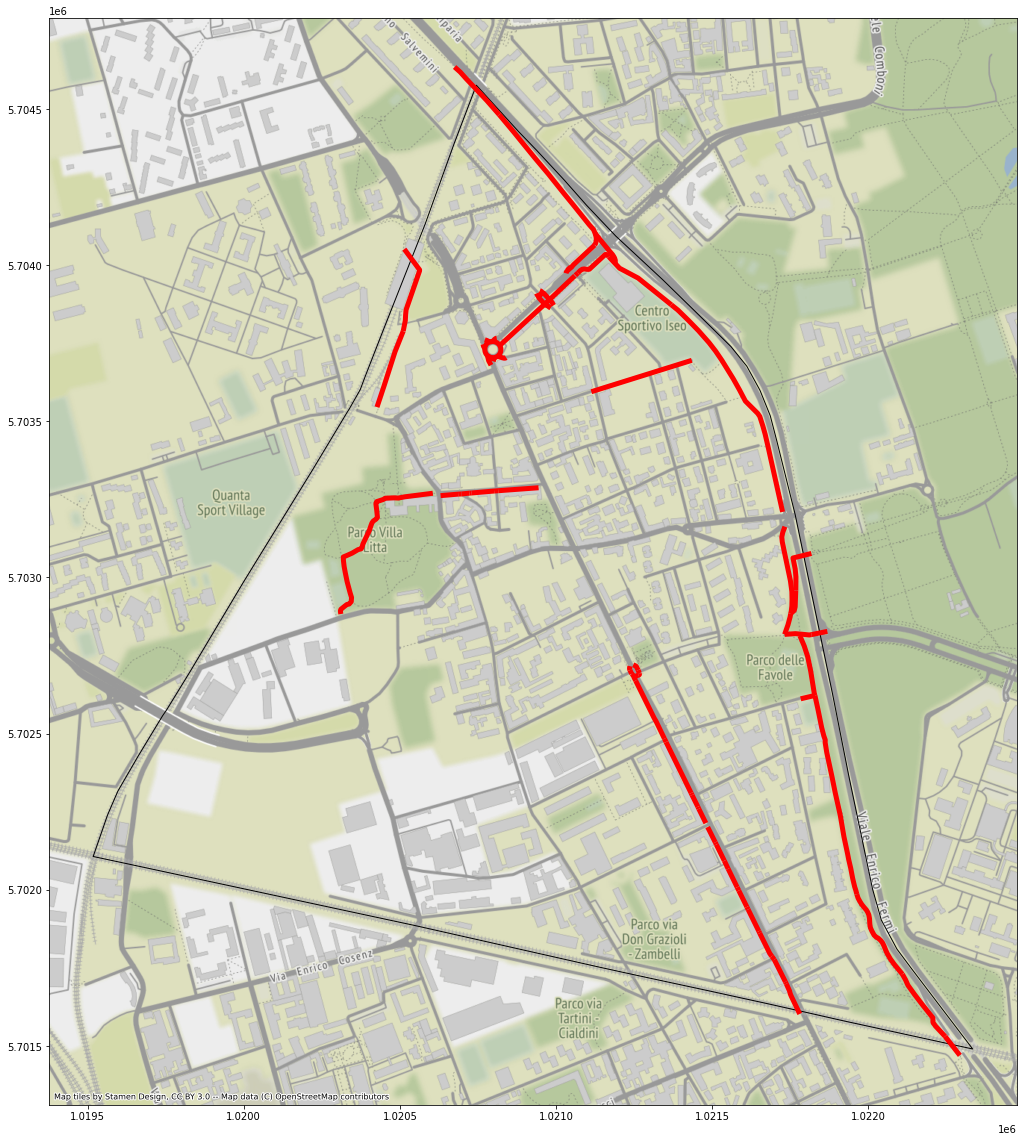

In [16]:
ax = affori.to_crs(epsg=3857).plot(facecolor = "none", edgecolor = "k", figsize=(30,20))
piste_affori.to_crs(epsg=3857).plot(ax = ax, edgecolor = "r", linewidth = 5)
ctx.add_basemap(ax)